# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [19]:
! git clone https://github.com/ds4e/EDA

fatal: destination path 'EDA' already exists and is not an empty directory.


Part 1

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Pandas automatically uses some pyplot functions, so we need it loaded

df = pd.read_csv('/content/EDA/assignment/data/ForeignGifts_edu.csv', low_memory=False)
print(df.head(100),'\n')
print(df.describe(),'\n')

     ID   OPEID                     Institution Name          City State  \
0     1  102000        Jacksonville State University  Jacksonville    AL   
1     2  104700                      Troy University          Troy    AL   
2     3  105100                University of Alabama    Tuscaloosa    AL   
3     4  105100                University of Alabama    Tuscaloosa    AL   
4     5  105100                University of Alabama    Tuscaloosa    AL   
..  ...     ...                                  ...           ...   ...   
95   96  105200  University of Alabama at Birmingham    Birmingham    AL   
96   97  105200  University of Alabama at Birmingham    Birmingham    AL   
97   98  105200  University of Alabama at Birmingham    Birmingham    AL   
98   99  105200  University of Alabama at Birmingham    Birmingham    AL   
99  100  105200  University of Alabama at Birmingham    Birmingham    AL   

    Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                

Part 2

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


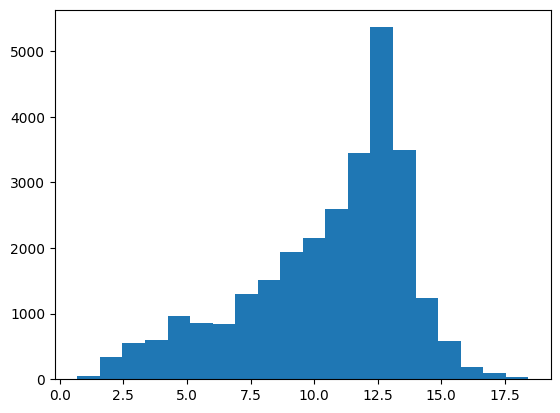

In [41]:
df['Foreign Gift Amount_log'] = np.log(df['Foreign Gift Amount'])
# df['bond_log'].hist() # This crashes: We need to locate the non-infinte values
df.loc[df['Foreign Gift Amount_log']>0,'Foreign Gift Amount_log'].hist(bins=20,grid=False)


Describing Findings:
       Foreign Gift Amount  
count         2.822100e+04  
mean          5.882327e+05  
std           3.222011e+06  
min          -5.377700e+05  
25%           5.700000e+03  
50%           9.461500e+04  
75%           3.761420e+05  
max           1.000000e+08

Part 3

In [49]:
# Create a value counts table for the 'Gift Type' column
gift_counts = df['Gift Type'].value_counts()

# Display the value counts
print(gift_counts)

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64


In [54]:
gift_proportions = df['Gift Type'].value_counts(normalize=True)

print(gift_proportions)

# Extract specific proportions for 'contracts', 'real estate', and 'monetary'
contract_proportion = gift_proportions.get('Contract', 0)
real_estate_proportion = gift_proportions.get('Real Estate', 0)
monetary_proportion = gift_proportions.get('Monetary Gift', 0)

print(f"Proportion of contracts: {contract_proportion}")
print(f"Proportion of real estate: {real_estate_proportion}")
print(f"Proportion of monetary gifts: {monetary_proportion}")

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64
Proportion of contracts: 0.6120973742957372
Proportion of real estate: 0.00038978065979235324
Proportion of monetary gifts: 0.3875128450444704


Part 4

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

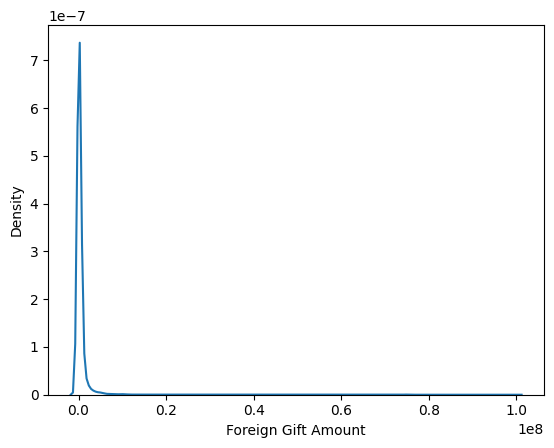

In [60]:
var = 'Foreign Gift Amount'
sns.kdeplot(df[var]) # A kernel density plot
#sns.kdeplot(data=df, x=var) # Same thing
plt.show()

[Text(0.5, 1.0, 'Foreign Gift Amount by Gift Type')]

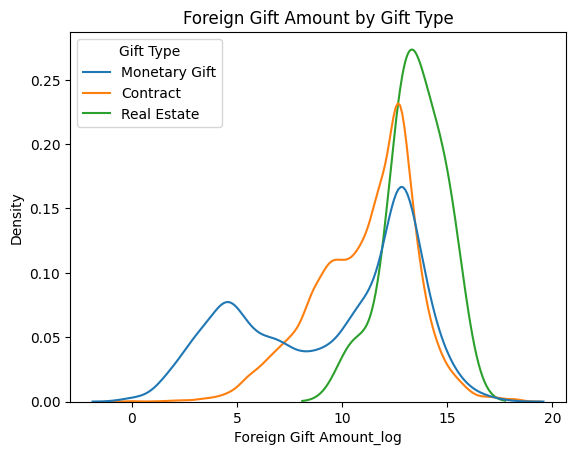

In [62]:

conditioning = 'Gift Type'
var = 'Foreign Gift Amount_log'
sns.kdeplot( data=df, x=var, hue=conditioning, common_norm=False).set(title='Foreign Gift Amount by Gift Type')

Part 5

In [63]:
# top 15 countries in terms of the number of gifts
var = 'Foreign Gift Amount'
group = 'Country of Giftor'

df.loc[:, [group, var]].groupby(group).count().sort_values(by=var, ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [64]:
#Top 15 countries in terms of the amount given
df.loc[:, [group, var]].groupby(group).sum().sort_values(by=var, ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


Part 6

In [65]:
# Top 15 institutions by the total amount received
institution_var = 'Institution Name'
amount_var = 'Foreign Gift Amount'

# Get the top 15 institutions by the total amount received
top_15_institutions = df.loc[:, [institution_var, amount_var]].groupby(institution_var).sum().sort_values(by=amount_var, ascending=False).head(15)

# Display the top 15 institutions by total amount received
print(top_15_institutions)


                                               Foreign Gift Amount
Institution Name                                                  
Carnegie Mellon University                              1477922504
Cornell University                                      1289937761
Harvard University                                       954803610
Massachusetts Institute of Technology                    859071692
Yale University                                          613441311
Texas A&M University                                     521455050
Johns Hopkins University                                 502409595
Northwestern University                                  402316221
Georgetown University                                    379950511
University of Chicago (The)                              364544338
University of Colorado Boulder                           360173159
Duke University                                          343699498
Brigham Young University                                 32350

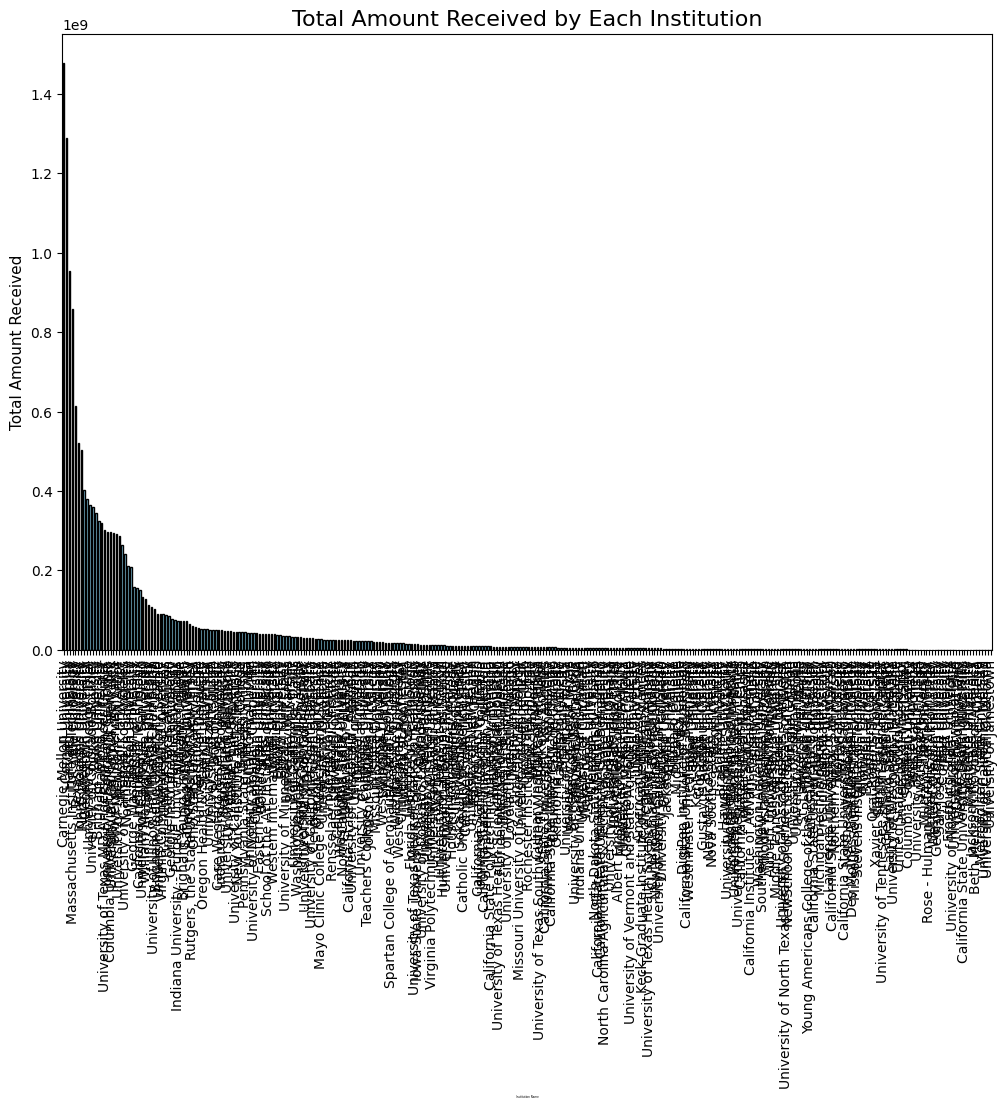

In [76]:
#Histogram showing how much EACH institution recieved
institution_var = 'Institution Name'
amount_var = 'Foreign Gift Amount'

all_institutions = df.loc[:, [institution_var, amount_var]].groupby(institution_var).sum().sort_values(by=amount_var, ascending=False)

# Create a histogram for the total amount received by the top 15 institutions
plt.figure(figsize=(12, 8))  # Set the figure size
all_institutions[amount_var].plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels for clarity
plt.title('Total Amount Received by Each Institution', fontsize=16)
plt.xlabel('Institution Name', fontsize=2)
plt.ylabel('Total Amount Received', fontsize=11)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Display the plot
plt.show()

Institution Name
Adelphi University                                        1000000
Albert Einstein College of Medicine                       4252385
Alfred University                                         2711699
American University (The)                                 3489000
Amherst College                                            778723
                                                          ...    
Wright State University                                   1693644
Xavier University of Louisiana                             706193
Yale University                                         613441311
Yeshiva University                                         297397
Young Americans College of the Performing Arts (The)      1121583
Name: Foreign Gift Amount, Length: 318, dtype: int64


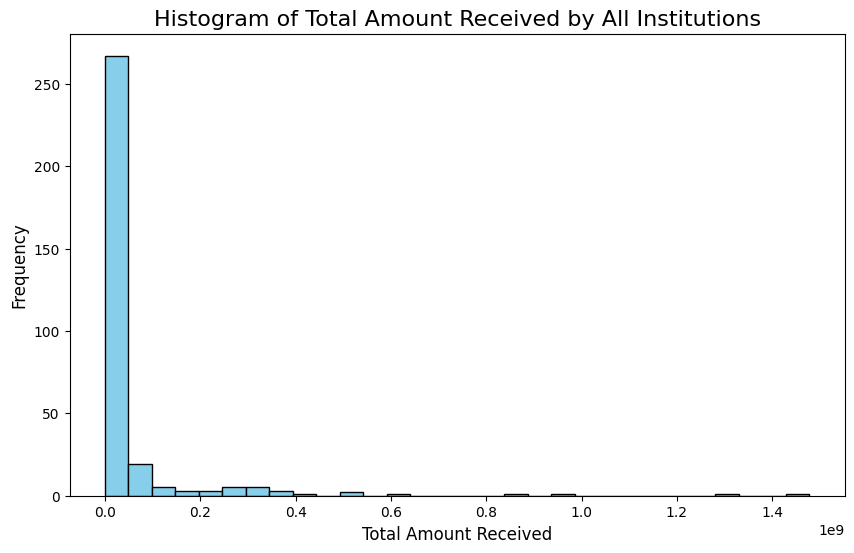

In [77]:
#Histogram showing how much ALL the institutions recieved
institution_amounts = df.groupby('Institution Name')['Foreign Gift Amount'].sum()

# Display the total amount for each institution
print(institution_amounts)

plt.figure(figsize=(10, 6))  # Set the figure size
institution_amounts.plot(kind='hist', bins=30, edgecolor='black', color='skyblue')

# Add title and labels for clarity
plt.title('Histogram of Total Amount Received by All Institutions', fontsize=16)
plt.xlabel('Total Amount Received', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

Part 7

In [78]:
#GIFTORS WHO GIFT THE MOST MONEY IN TOTAL
giftor_var = 'Giftor Name'
amount_var = 'Foreign Gift Amount'

# Group by 'Giftor Name' and sum the Foreign Gift Amount for each giftor
top_giftors = df.groupby(giftor_var)[amount_var].sum().sort_values(ascending=False)

# Display the top giftors by total amount given
print(top_giftors.head(15))

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

Part 1

In [80]:
file_path = '/content/EDA/assignment/data/airbnb_hw.csv'
airbnb_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
airbnb_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Part 2

In [82]:
print("Dimensions of the data:", airbnb_df.shape)

# Get the number of observations (rows)
print("Number of observations:", airbnb_df.shape[0])

# Get the names of the variables (columns)
print("Variables included:", airbnb_df.columns.tolist())

Dimensions of the data: (30478, 13)
Number of observations: 30478
Variables included: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']


Part 3

In [84]:
# Cross-tabulate Room Type and Property Type
room_property_crosstab = pd.crosstab(airbnb_df['Room Type'], airbnb_df['Property Type'])

# Display the cross-tabulation
print(room_property_crosstab)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

Part 4

Observations:
Private rooms are more common than entire properties for houses and condominiums, but entire apartments are still the most common choice for larger properties, especially apartments.
Shared rooms are rare across the board, with apartments being the primary property type offering shared room options. Smaller properties like boats and castles have relatively few entire rentals listed, with private rooms being more common in these unique property types.